 import libraries

In [1]:
%reload_ext autoreload
%autoreload 2

import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
%matplotlib inline
plt.style.use('fivethirtyeight')

import seaborn as sns

import pickle
##from SCRIPT.eval_tools import *

 let's load some data! 🥒

In [2]:
with open('pickle/timeseries_one_bedroom_subset_percent.pkl', 'rb') as fp:
    subset_percent = pickle.load(fp)

In [3]:
with open('pickle/timeseries_one_bedroom_subset.pkl', 'rb') as fp:
    subset = pickle.load(fp)

In [4]:
subset.head(6)

95628     95835    95833     95838     95820     95825     95815  \
02/2009  137483.0  124608.0  97923.0  129445.0  146230.0  103017.0  143893.0   
03/2009  139169.0  122241.0  96360.0  126313.0  144171.0  101763.0  144743.0   
04/2009  140425.0  121259.0  94905.0  123502.0  144375.0  100432.0  143633.0   
05/2009  140643.0  120530.0  93797.0  121169.0  146108.0   98445.0  141687.0   
06/2009  143248.0  118499.0  93579.0  121569.0  142983.0   95444.0  138628.0   
07/2009  143672.0  114295.0  93503.0  119666.0  135924.0   91710.0  134662.0   

            95818     95816     95817     95811  
02/2009  115813.0  205113.0  109728.0  419973.0  
03/2009  115171.0  203966.0  108125.0  424720.0  
04/2009  116314.0  203217.0  108114.0  429103.0  
05/2009  117772.0  203332.0  107957.0  434650.0  
06/2009  121287.0  203527.0  109327.0  427960.0  
07/2009  122456.0  202351.0  107420.0  420206.0

In [5]:
subset_percent.head()

95628     95835     95833     95838     95820     95825     95815  \
03/2009  1.226333 -1.899557 -1.596152 -2.419560 -1.408056 -1.217275  0.590717   
04/2009  0.902500 -0.803331 -1.509963 -2.225424  0.141499 -1.307941 -0.766876   
05/2009  0.155243 -0.601192 -1.167483 -1.889038  1.200346 -1.978453 -1.354842   
06/2009  1.852207 -1.685058 -0.232417  0.330117 -2.138829 -3.048403 -2.158984   
07/2009  0.295990 -3.547709 -0.081215 -1.565366 -4.936951 -3.912242 -2.860894   

            95818     95816     95817     95811  
03/2009 -0.554342 -0.559204 -1.460885  1.130311  
04/2009  0.992437 -0.367218 -0.010173  1.031974  
05/2009  1.253503  0.056590 -0.145217  1.292697  
06/2009  2.984580  0.095902  1.269024 -1.539169  
07/2009  0.963830 -0.577810 -1.744308 -1.811852

  train test split

In [6]:
trdf_percent = subset_percent.iloc[:-40]
trdf_percent.index = pd.to_datetime(trdf_percent.index)

In [7]:
trdf_price = subset.iloc[:-40]
trdf_price.index = pd.to_datetime(trdf_price.index)

 Average Percent Increase of Housing Price

In [20]:
subset_percent.head(20)

95628     95835     95833     95838     95820     95825     95815  \
03/2009  1.226333 -1.899557 -1.596152 -2.419560 -1.408056 -1.217275  0.590717   
04/2009  0.902500 -0.803331 -1.509963 -2.225424  0.141499 -1.307941 -0.766876   
05/2009  0.155243 -0.601192 -1.167483 -1.889038  1.200346 -1.978453 -1.354842   
06/2009  1.852207 -1.685058 -0.232417  0.330117 -2.138829 -3.048403 -2.158984   
07/2009  0.295990 -3.547709 -0.081215 -1.565366 -4.936951 -3.912242 -2.860894   
08/2009 -0.464948 -4.155912 -0.622440 -3.025086 -3.363644 -3.619016 -4.692489   
09/2009 -2.866353 -3.172212 -0.659700 -2.688589 -1.437359 -2.716340 -3.318451   
10/2009 -1.642849 -1.808240 -2.007410 -1.955263 -1.245906 -1.610652 -2.391928   
11/2009 -0.999100 -1.316345 -1.899287 -0.761394 -0.570977 -4.207789 -2.763466   
12/2009 -1.066850 -1.158774 -2.960434 -3.180887 -0.833851 -4.571534 -3.388837   
01/2010 -1.500579 -0.073826 -2.643131 -2.428088 -0.074567 -4.292733 -3.599993   
02/2010 -0.999947  0.039403 -3.161009 -3.413393 -2.165647 -0.607944 -2.829999   
03/2010 -1.276736  0.930530 -2.664318 -1.993935 -2.771850 -1.500612 -2.382293   
04/2010 -2.702157 -0.814634 -0.513787 -1.807542 -2.621367  1.799465 -1.893521   
05/2010 -2.572960 -0.544927 -0.694524 -2.524902 -2.324266 -0.124712 -1.447060   
06/2010 -3.545780 -2.091761 -1.091342 -2.638155 -1.192419  0.545617 -1.208844   
07/2010 -0.662212 -0.699018 -2.485204 -2.684520 -0.577208 -2.995410 -1.744888   
08/2010 -2.235764 -2.082316 -1.349305 -0.969653 -1.192379 -3.021110 -1.815817   
09/2010 -1.758880 -1.317307  0.249051 -1.521985 -2.230036 -1.905582 -2.306272   
10/2010 -2.803905 -2.775058  1.557737 -1.065629 -1.828789 -0.966911 -1.748916   

            95818     95816     95817     95811  
03/2009 -0.554342 -0.559204 -1.460885  1.130311  
04/2009  0.992437 -0.367218 -0.010173  1.031974  
05/2009  1.253503  0.056590 -0.145217  1.292697  
06/2009  2.984580  0.095902  1.269024 -1.539169  
07/2009  0.963830 -0.577810 -1.744308 -1.811852  
08/2009  0.413210 -0.494191 -0.160119 -1.324112  
09/2009 -0.055302  0.015396  0.098836  0.613300  
10/2009  0.478461  0.740384  1.751216  3.330177  
11/2009  0.315026  0.721141 -0.021056  1.921230  
12/2009  0.667630  0.406194 -1.685728  2.171113  
01/2010 -0.900576 -1.568973 -2.485797 -0.319225  
02/2010 -1.278576 -1.874254 -2.254993 -0.740838  
03/2010 -2.141891 -1.647642 -1.538988 -0.786444  
04/2010 -0.253807 -0.239101 -1.358607 -2.021522  
05/2010  1.923933  1.030700 -0.776691  0.495194  
06/2010  1.742605  0.050398 -0.817245 -0.261819  
07/2010  0.778232 -0.101764 -0.215707  0.889655  
08/2010 -1.269627 -1.229028 -0.428248 -0.393951  
09/2010 -1.291651 -0.787950  0.141991  0.977507  
10/2010 -0.779195 -0.351884  0.941157  1.238805

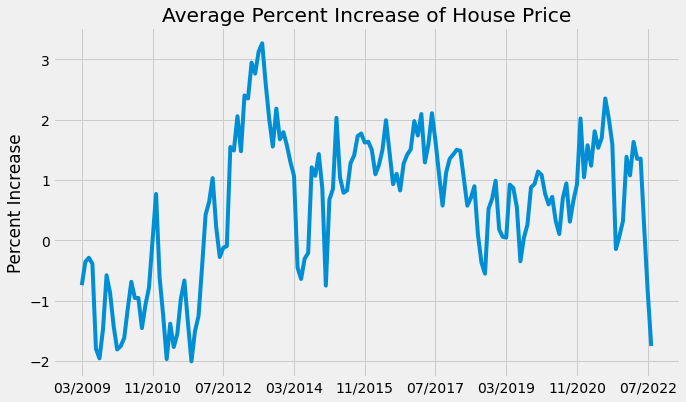

In [9]:
mean = np.mean(subset_percent, axis = 1)
ax = mean.plot(figsize = (10, 6))
plt.ylabel('Percent Increase')
plt.title('Average Percent Increase of House Price')
plt.show()

Average Housing Price

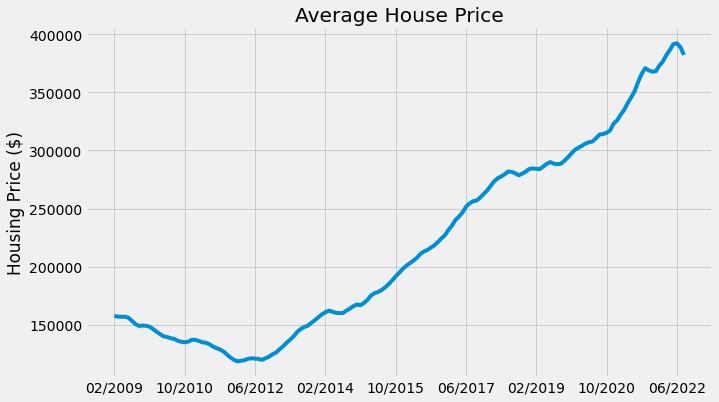

In [10]:
price_mean = np.mean(subset, axis = 1)
ax = price_mean.plot(figsize = (10, 6))
plt.ylabel('Housing Price ($)')
plt.title('Average House Price')
plt.show()

 Percent Increase All Zip Codes

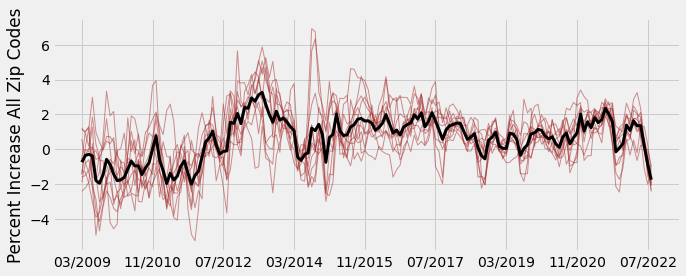

In [11]:
subset_percent.plot(figsize = (10, 4), lw = 1, color = 'brown', alpha = 0.5)
mean.plot(c = 'black', lw = 3)
plt.legend().set_visible(False)
plt.ylabel('Percent Increase All Zip Codes')
plt.show()

 Housing Price ($) All Zip Codes

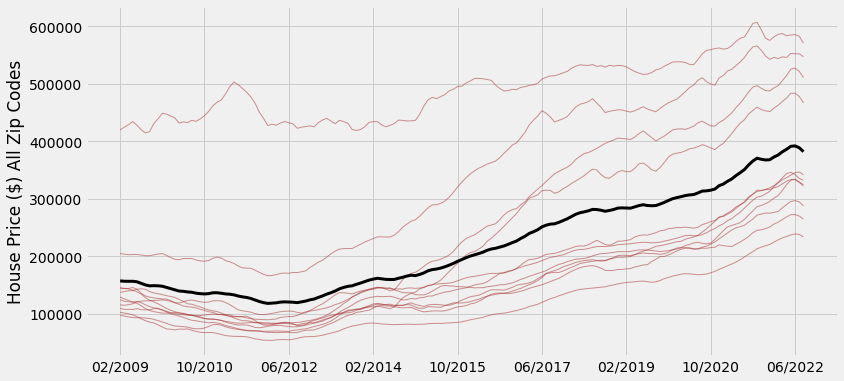

In [14]:
subset.plot(figsize = (12, 6), lw = 1, color = 'brown', alpha = 0.5)
price_mean.plot(c = 'black', lw = 3)
plt.legend().set_visible(False)
plt.ylabel('House Price ($) All Zip Codes')
plt.show()

 areas against the trend

 calculate absolute difference

In [15]:
diff_df = trdf_price.apply(lambda x: abs(x-mean))

 top 5 zipcodes with odd trends  

In [17]:
diffs = np.sum(diff_df, axis = 0).sort_values(ascending = False)
select_zipcodes = list(diffs.index[0:11])
print(f'top 5 zipcodes with odd trends: {select_zipcodes}')

top 5 zipcodes with odd trends: [95628, 95835, 95833, 95838, 95820, 95825, 95815, 95818, 95816, 95817, 95811]


 zip closest to average

In [18]:
print(f'closest to the average: {diffs.index[-2]}')

closest to the average: 95817
